# 05. Profile Likelihoods

In [1]:
import sys 
sys.path.append(r'..')

from estim8.models import FmuModel
from estim8 import visualization, datatypes, Estimator
from estim8.error_models import LinearErrorModel
import pandas as pd

## 6.1 Load the model 

In [2]:
SimpleBatchModel = FmuModel(path='SimpleBatch.fmu')

## 6.2 Import experimental data

In [3]:
data = pd.read_excel(r'SimpleBatch_Data.xlsx', index_col=0)
data.head()

,X,S
0.0,0.176200,NaN
0.1,0.318313,NaN
0.2,0.285270,NaN
0.3,0.218600,NaN
0.4,0.248210,NaN


## 6.3 Defining the estimation problem

In [4]:
## define unknown parameters with upper and lower bounds
bounds = {
    'X0': [0.05, 0.15],
    'mu_max': [0.1, 0.9],
    'Y_XS': [0.1, 1]
}

In [5]:
estimator = Estimator(
    model=SimpleBatchModel,
    bounds=bounds,
    data=datatypes.Experiment(data, error_model=LinearErrorModel(slope=0.05, offset=0.1)),
    t=[0, 10, 0.1],
    metric="negLL"
)

## 6.4 Find the Optimum

In [6]:
estimates, est_info = estimator.estimate(
    method='de',
    max_iter=1000,
    n_jobs=4,
)

c:\Users\Latour\AppData\Local\miniforge-pypy3\envs\testim8\lib\site-packages\scipy\optimize\_differentialevolution.py:487: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


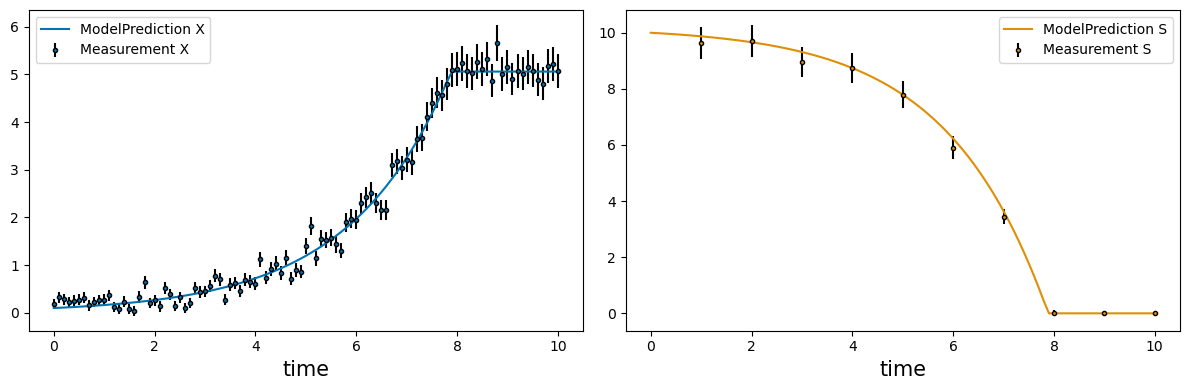

In [7]:
_ = visualization.plot_estimates(estimator=estimator, estimates=estimates, only_measured=True)

## 6.4 Profile Likelihood Calculation

_Note_: This method puts considerable amount of work on your machine

In [8]:
pl_result = estimator.profile_likelihood(
    p_opt= estimates,
    method='de',        
    max_iter=1000,      # maximum iterations for each estimation run 
    n_jobs=2,           # parallelization of each estimation run 
    p_at_once=5,      # number of estimations to be run in parallel
    n_points=10,
    dp_rel=0.9
)

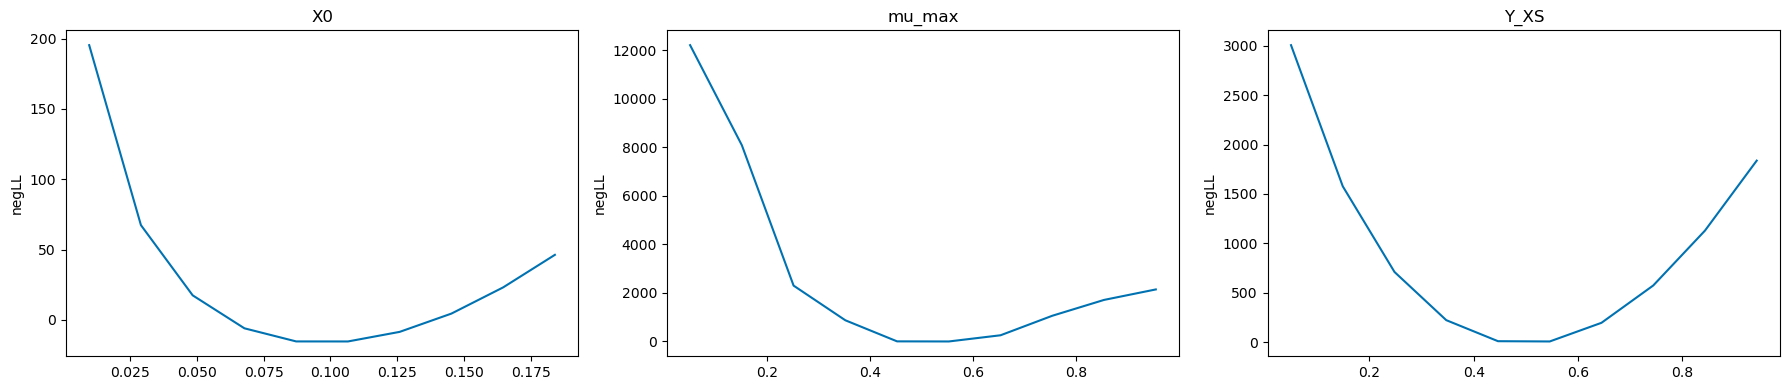

In [9]:
_ = visualization.plot_profile_likelihood(pl_result)